Make a calibration file for the "kpup_snspd" project.

Typical resonances are 2.695, 2.7235, 2.767, 2.796, 2.83

In [1]:
import importlib
from mkids import TopSoc
import numpy as np
import matplotlib.pyplot as plt
import Scan
import pickle
import datetime

In [2]:
# This should take a few seconds.  If it seems to hang, interrupt
# the kernel and run it again.  
soc = TopSoc()

In [3]:
scan = Scan.Scan(soc)

In [4]:
fTones = 1e3*np.array([2.695, 2.7235, 2.767, 2.796, 2.83])

In [5]:
# Load a calibration file
cfn = "calibration-kpup-2023-03-24-14-14-10.pkl"

# Load the calibration written in tutorial_09_scan_calibration.ipynb
with open(cfn, 'rb') as file:
    calibration = pickle.load(file)

print("calibration loaded")
print("fMin, fMax =",calibration['fMin'], calibration['fMax'])

calibration loaded
fMin, fMax = 2692.0 2833.0


In [6]:
fMixer = calibration['fMixer']
soc.set_mixer(fMixer)

2499.9999755859376

In [7]:
f0 = fTones.min() - 3
f1 = fTones.max() + 3
fToneMid = fTones.mean()
print("fToneMid =",fToneMid)

fToneMid = 2762.3


In [8]:
toneFreqs = fTones[:]
toneAmps = 0.9*np.ones(len(toneFreqs))/len(toneFreqs)
np.random.seed(12399512)
toneFis = np.random.uniform(0, 2*np.pi, size=len(toneFreqs))

bandwidth = 0.4 # MHz
nf = 50
decimation = 2
nt = 3
doProgress = True

scan = Scan.Scan(soc)
toneFScan = scan.fscan(toneFreqs, toneAmps, toneFis, bandwidth, nf, decimation,nt, doProgress=doProgress)


  0%|          | 0/50 [00:00<?, ?it/s]

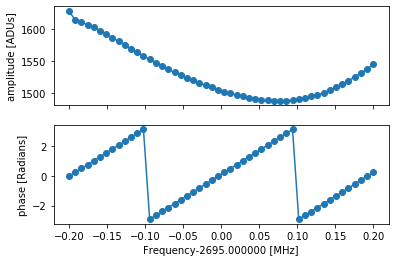

In [9]:
Scan.fscanPlot(toneFScan, 0)

In [14]:
importlib.reload(Scan)
scan = Scan.Scan(soc)
cToneFScan = scan.applyCalibration(toneFScan, calibration)

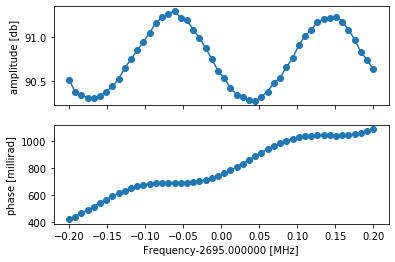

In [15]:
Scan.fscanPlot(cToneFScan, 0, db=True, millirad=True)

In [ ]:
Scan.plotCalibrationAndScan(fTones[0]-.5, fTones[0]+0.5, calibration, toneFScan)